In [2]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory('../data/plant_disease/train',
                                                 target_size=(150,150),
                                                             batch_size=20,  class_mode='binary')
validation_set = test_datagen.flow_from_directory('../data/plant_disease/validate',
                                                 target_size=(150,150),
                                                             batch_size=20,  class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
# Compile model

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=0.001),
             metrics=['acc'])

In [5]:
# Fit model

history = model.fit_generator(training_set,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_set,
                              validation_steps=10)
model.save('plpant_disease.h5')

C:\Users\sylvi\AppData\Local\Temp\ipykernel_19484\1075406310.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/20
50/50 [==============================] - 15s 278ms/step - loss: 0.8519 - acc: 0.5920 - val_loss: 0.6575 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 13s 269ms/step - loss: 0.6198 - acc: 0.7790 - val_loss: 0.3969 - val_acc: 0.8300
Epoch 3/20
50/50 [==============================] - 13s 268ms/step - loss: 0.3904 - acc: 0.8790 - val_loss: 0.2220 - val_acc: 0.9300
Epoch 4/20
50/50 [==============================] - 13s 268ms/step - loss: 0.2347 - acc: 0.9130 - val_loss: 0.1425 - val_acc: 0.9450
Epoch 5/20
50/50 [==============================] - 13s 266ms/step - loss: 0.2365 - acc: 0.9270 - val_loss: 0.1801 - val_acc: 0.9400
Epoch 6/20
50/50 [==============================] - 13s 267ms/step - loss: 0.1656 - acc: 0.9400 - val_loss: 0.0900 - val_acc: 0.9600
Epoch 7/20
50/50 [==============================] - 13s 269ms/step - loss: 0.1309 - acc: 0.9640 - val_loss: 0.0315 - val_acc: 0.9900
Epoch 8/20
50/50 [==============================] - 14s 276ms/step - 

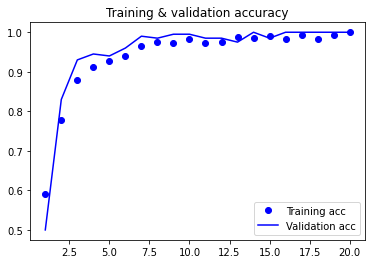

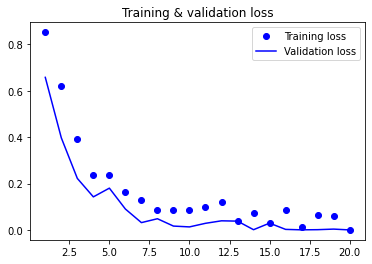

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# bo and b is marker
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & validation loss')
plt.legend()

plt.show()

(256, 256, 3)

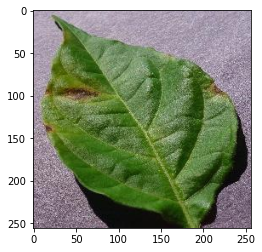

In [10]:
import matplotlib.pyplot as plt
from matplotlib import image as img
test_image = img.imread('../images/uh_3.JPG')
test_image.shape

plt.imshow(test_image)
test_image.shape

In [13]:
# Format test_image shape as expected by predict method

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../images/uh_3.JPG', target_size=(150,150))

# convert format of images pil to array. predict method expects 2D array
test_image = image.img_to_array(test_image)

# CNN was trained on batch during training and not on single image,
# we have extra dimension for batch. Now for test even though 1 image
# we have to change it to batch format.
test_image = np.expand_dims(test_image, axis=0)

print(test_image.shape)

print(training_set.class_indices)

(1, 150, 150, 3)
{'healthy': 0, 'unhealthy': 1}


In [14]:
# call predict method
rzlt = model.predict(test_image)
# to access the image inside the batch
if rzlt[0][0] == 1:
    prediction = 'unhealthy'
else:
    prediction = 'healthy'

print(prediction)

unhealthy


(256, 256, 3)

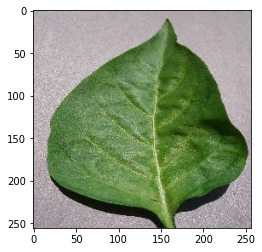

In [19]:
import matplotlib.pyplot as plt
from matplotlib import image as img
test_image = img.imread('../images/h_3.JPG')
test_image.shape

plt.imshow(test_image)
test_image.shape

In [20]:
# Format test_image shape as expected by predict method

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../images/h_3.JPG', target_size=(150,150))

# convert format of images pil to array. predict method expects 2D array
test_image = image.img_to_array(test_image)

# CNN was trained on batch during training and not on single image,
# we have extra dimension for batch. Now for test even though 1 image
# we have to change it to batch format.
test_image = np.expand_dims(test_image, axis=0)

print(test_image.shape)

print(training_set.class_indices)

(1, 150, 150, 3)
{'healthy': 0, 'unhealthy': 1}


In [21]:
# call predict method
rzlt = model.predict(test_image)
# to access the image inside the batch
if rzlt[0][0] == 1:
    prediction = 'unhealthy'
else:
    prediction = 'healthy'

print(prediction)

healthy
